<h2> b.a.m 예시<h2/>

Learned 40 images


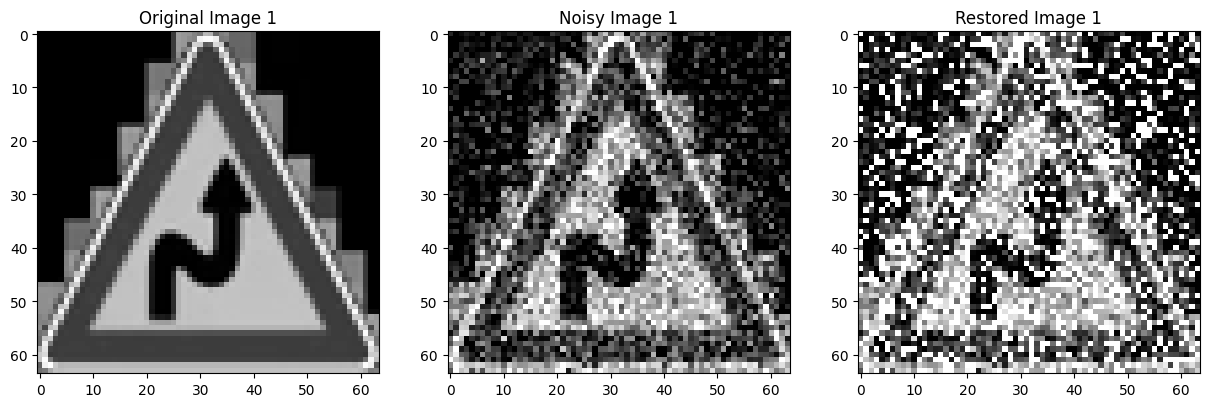

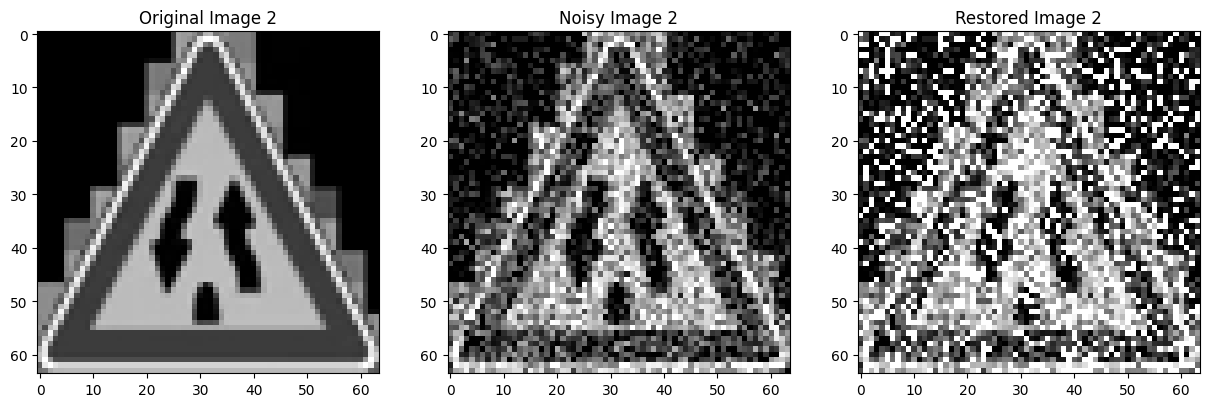

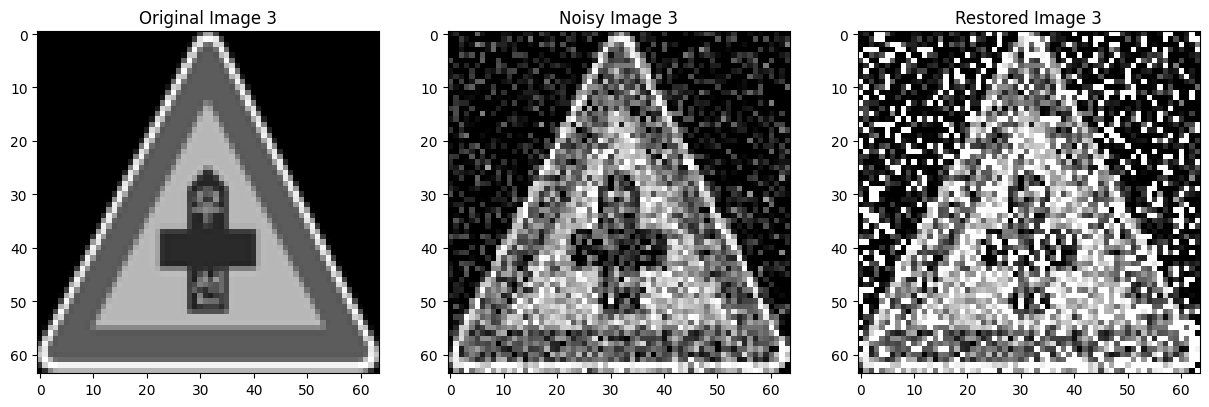

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import random

class ImprovedBAM:
    def __init__(self, input_size, output_size):
        self.W = np.zeros((input_size, output_size))
    
    def hebbian_learning(self, x, y):
        self.W += np.outer(x, y)
        self.symmetrize_weights()
    
    def symmetrize_weights(self):
        self.W = (self.W + self.W.T) / 2 
    
    def energy(self, x, y):
        return -0.5 * (np.dot(np.dot(x, self.W), y) + np.dot(np.dot(y, self.W.T), x))
    
    def stochastic_update(self, x, temperature=1.0):
        prob = 1 / (1 + np.exp(-x / temperature))
        return np.random.random(x.shape) < prob
    
    def async_recall(self, x, iterations=1000, temperature=1.0):
        y = np.dot(x, self.W)
        for _ in range(iterations):
            i = np.random.randint(len(x))
            x[i] = self.stochastic_update(np.dot(self.W[i, :], y), temperature)
            j = np.random.randint(len(y))
            y[j] = self.stochastic_update(np.dot(self.W[:, j], x), temperature)
        return x, y

def load_and_preprocess_image(image_path, target_size=(64, 64)):
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img = img.resize(target_size)
    img_array = np.array(img) / 255.0  # Normalize to [0, 1]
    return img_array.flatten()

def add_noise(image, noise_factor=0.2):
    noisy_image = image + noise_factor * np.random.randn(*image.shape)
    return np.clip(noisy_image, 0, 1)

# Set the path to your image folder
image_folder = "data"

# Initialize the ImprovedBAM
image_size = 64 * 64  # Assuming 64x64 images
bam = ImprovedBAM(image_size, image_size)

# Load and learn from all images in the folder
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]
images = []

for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)
    image = load_and_preprocess_image(image_path)
    images.append(image)
    bam.hebbian_learning(image, image)

print(f"Learned {len(images)} images")

# Function to test and visualize results
def test_and_visualize(test_image, index):
    noisy_image = add_noise(test_image)
    restored_image, _ = bam.async_recall(noisy_image.copy(), temperature=0.1)

    plt.figure(figsize=(15, 5))
    plt.subplot(131)
    plt.imshow(test_image.reshape((64, 64)), cmap='gray')
    plt.title(f'Original Image {index}')
    plt.subplot(132)
    plt.imshow(noisy_image.reshape((64, 64)), cmap='gray')
    plt.title(f'Noisy Image {index}')
    plt.subplot(133)
    plt.imshow(restored_image.reshape((64, 64)), cmap='gray')
    plt.title(f'Restored Image {index}')
    plt.show()

# Test with multiple random images
num_test_images = 3  # You can change this number
test_indices = random.sample(range(len(images)), num_test_images)

for i, index in enumerate(test_indices):
    test_image = images[index]
    test_and_visualize(test_image, i+1)

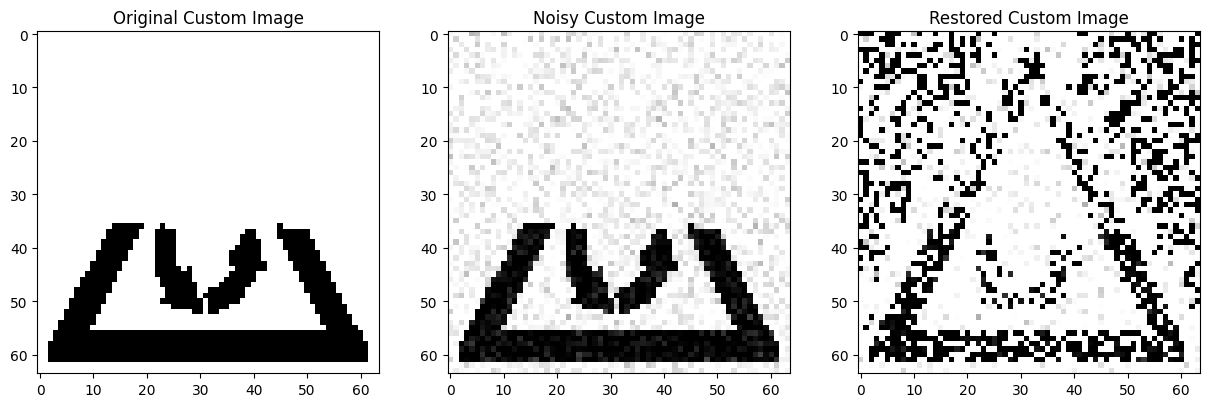

In [20]:

# 새로운 함수 추가
def restore_custom_image(bam, image_path):
    # 이미지 로드 및 전처리
    original_image = load_and_preprocess_image(image_path)
    
    # 노이즈 추가
    noisy_image = add_noise(original_image)
    
    # 이미지 복원
    restored_image, _ = bam.async_recall(noisy_image.copy(), temperature=0.1)
    
    # 결과 시각화
    plt.figure(figsize=(15, 5))
    plt.subplot(131)
    plt.imshow(original_image.reshape((64, 64)), cmap='gray')
    plt.title('Original Custom Image')
    plt.subplot(132)
    plt.imshow(noisy_image.reshape((64, 64)), cmap='gray')
    plt.title('Noisy Custom Image')
    plt.subplot(133)
    plt.imshow(restored_image.reshape((64, 64)), cmap='gray')
    plt.title('Restored Custom Image')
    plt.show()

# 메인 코드 끝에 다음 내용 추가
# 사용자 지정 이미지 복원
custom_image_path = "test/손상3.png"  # 이 부분을 실제 이미지 경로로 변경하세요
restore_custom_image(bam, custom_image_path)